### 1. IMPORT LIBRARIES AND SETUP

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. DATA LOADING WITH OPTIMIZATION

In [10]:
def load_data_with_memory_optimization(filepath, nrows=None, use_dtypes=True):
    print(f"\nLoading data from: {filepath}")
    
    if use_dtypes:
        dtype_dict = {
            'loan_amnt': 'float32',
            'funded_amnt': 'float32',
            'funded_amnt_inv': 'float32',
            'int_rate': 'float32',
            'installment': 'float32',
            'annual_inc': 'float32',
            'dti': 'float32',
            'delinq_2yrs': 'int16',
            'inq_last_6mths': 'int8',
            'open_acc': 'int16',
            'pub_rec': 'int8',
            'revol_bal': 'float32',
            'revol_util': 'float32',
            'total_acc': 'int16',
            'total_pymnt': 'float32',
            'total_rec_prncp': 'float32',
            'total_rec_int': 'float32',
            'last_pymnt_amnt': 'float32'
        }
    else:
        dtype_dict = None
    
    try:
        df = pd.read_csv(
            filepath,
            nrows=nrows,
            dtype=dtype_dict,
            low_memory=False,
            encoding='latin-1'  
        )
        
        print(f"Successfully loaded {len(df):,} rows and {len(df.columns)} columns")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        return df
    
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        print("\nPlease download the data first:")
        print("1. accepted_2007_to_2018Q4.csv from Kaggle")
        print("2. Or run: python src/ingestion/download_data.py")
        return None
    except Exception as e:
        print(f"✗ Error loading data: {e}")
        return None

file_paths = [
    "..\\data\\raw\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv",
    "../data/raw/accepted_2007_to_2018Q4_sample.csv",
    "data/raw/accepted_2007_to_2018Q4.csv"
]

df = None
for path in file_paths:
    df = load_data_with_memory_optimization(path, nrows=100000)  
    if df is not None:
        break

if df is None:
    print("\nCreating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 5000
    df = pd.DataFrame({
        'loan_amnt': np.random.uniform(1000, 35000, n_samples).astype(int),
        'term': np.random.choice(['36 months', '60 months'], n_samples),
        'int_rate': np.random.uniform(5, 30, n_samples).round(2),
        'grade': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], n_samples),
        'emp_length': np.random.choice(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                                        '6 years', '7 years', '8 years', '9 years', '10+ years'], n_samples),
        'home_ownership': np.random.choice(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], n_samples),
        'annual_inc': np.random.uniform(20000, 150000, n_samples).astype(int),
        'verification_status': np.random.choice(['Verified', 'Source Verified', 'Not Verified'], n_samples),
        'issue_d': pd.to_datetime(np.random.choice(pd.date_range('2007-01-01', '2018-12-01', freq='MS'), n_samples)).strftime('%b-%Y'),
        'loan_status': np.random.choice(['Fully Paid', 'Charged Off', 'Current', 'Late'], n_samples, p=[0.7, 0.1, 0.15, 0.05]),
        'purpose': np.random.choice(['debt_consolidation', 'credit_card', 'home_improvement', 
                                     'major_purchase', 'medical', 'car', 'vacation'], n_samples),
        'addr_state': np.random.choice(['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'GA'], n_samples),
        'dti': np.random.uniform(0, 40, n_samples).round(2),
        'delinq_2yrs': np.random.randint(0, 5, n_samples),
        'open_acc': np.random.randint(1, 30, n_samples),
        'revol_bal': np.random.uniform(0, 50000, n_samples).astype(int),
        'revol_util': np.random.uniform(0, 100, n_samples).round(2),
        'total_acc': np.random.randint(1, 50, n_samples),
        'total_pymnt': np.random.uniform(0, 40000, n_samples).round(2),
        'total_rec_prncp': np.random.uniform(0, 35000, n_samples).round(2),
        'total_rec_int': np.random.uniform(0, 5000, n_samples).round(2),
        'application_type': np.random.choice(['Individual', 'Joint App'], n_samples, p=[0.9, 0.1])
    })
    print(f"Created sample data with {len(df):,} rows")


Loading data from: ..\data\raw\accepted_2007_to_2018q4.csv\accepted_2007_to_2018Q4.csv
Successfully loaded 100,000 rows and 151 columns
Memory usage: 248.09 MB


### 3. DATA OVERVIEW

In [11]:
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nData Types Distribution:")
print(df.dtypes.value_counts())

print("\nFirst 3 rows of data:")
display(df.head(3))

print("\nColumn Names (first 30):")
print(list(df.columns)[:30])

important_cols = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
    'open_acc', 'revol_bal', 'revol_util', 'total_acc',
    'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'last_pymnt_amnt', 'application_type'
]

available_cols = [col for col in important_cols if col in df.columns]
print(f"\nSelected {len(available_cols)}/{len(important_cols)} important columns for analysis")
print(f"Available columns: {available_cols}")

df_work = df[available_cols].copy()

if 'loan_status' in df_work.columns:
    default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period']
    df_work['is_default'] = df_work['loan_status'].apply(lambda x: 1 if str(x) in default_statuses else 0)
    print(f"Created target variable 'is_default'")
    print(f"Default rate: {df_work['is_default'].mean() * 100:.2f}% ({df_work['is_default'].sum():,} loans)")

Dataset Shape: 100,000 rows × 151 columns

Data Types Distribution:
float64    96
object     36
float32    13
int16       3
int8        2
int64       1
Name: count, dtype: int64

First 3 rows of data:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN



Column Names (first 30):
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths']

Selected 23/23 important columns for analysis
Available columns: ['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'application_type']
Created target variable 'is_default'
Default rate: 18.24% (18,244 loans)


### 4. MISSING VALUES ANALYSIS

Total columns analyzed: 24
Columns with missing values: 3
Total missing values: 6,151

Top 15 columns with highest missing percentage:


,Missing_Count,Missing_Percentage
emp_length,6112,6.11
revol_util,37,0.04
dti,2,0.00
loan_amnt,0,0.00
grade,0,0.00
sub_grade,0,0.00
int_rate,0,0.00
term,0,0.00
annual_inc,0,0.00
home_ownership,0,0.00


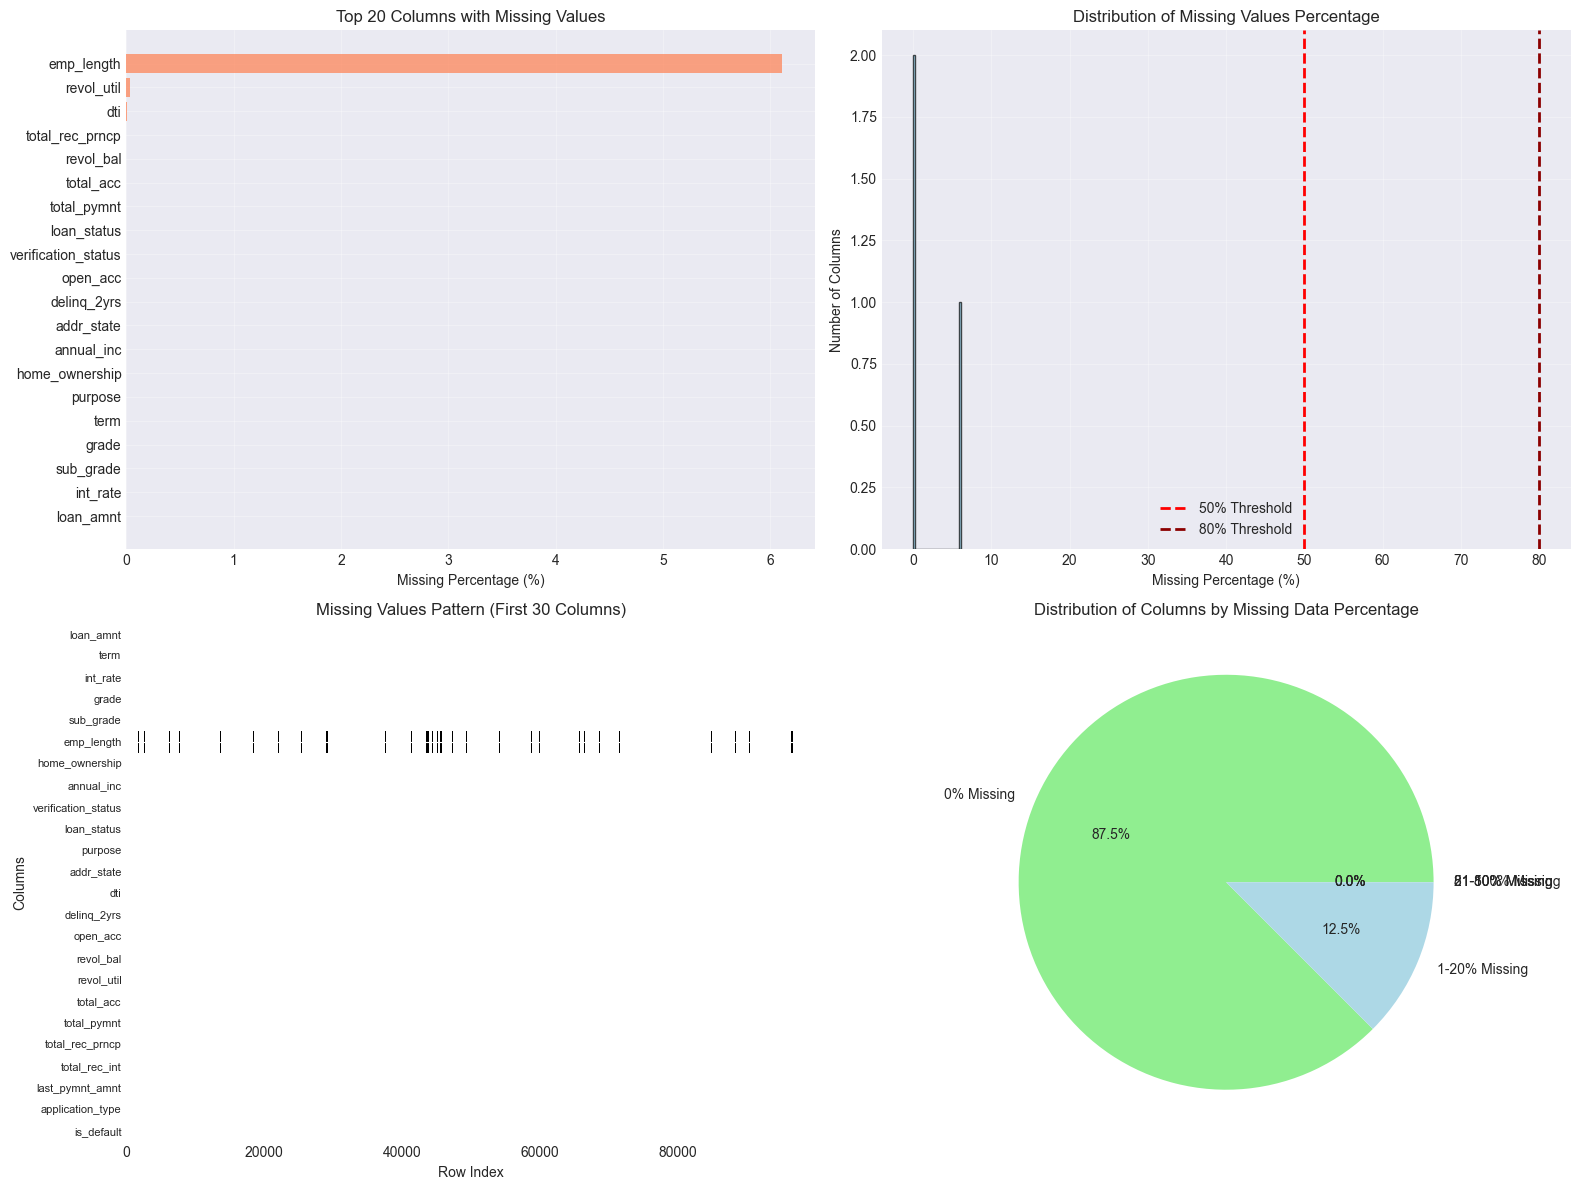


RECOMMENDATIONS FOR MISSING DATA:
1. Columns with >80% missing: Consider dropping
2. Columns with 50-80% missing: Evaluate importance
3. Columns with <50% missing: Impute or keep based on analysis


In [12]:
missing = df_work.isnull().sum()
missing_pct = (missing / len(df_work)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Percentage', ascending=False)

print(f"Total columns analyzed: {len(missing_df)}")
print(f"Columns with missing values: {(missing_df['Missing_Count'] > 0).sum()}")
print(f"Total missing values: {missing.sum():,}")

print("\nTop 15 columns with highest missing percentage:")
display(missing_df.head(15))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_missing = missing_df.head(20).sort_values('Missing_Percentage')
axes[0, 0].barh(range(len(top_missing)), top_missing['Missing_Percentage'], color='coral', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_missing)))
axes[0, 0].set_yticklabels(top_missing.index)
axes[0, 0].set_xlabel('Missing Percentage (%)')
axes[0, 0].set_title('Top 20 Columns with Missing Values')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(missing_pct[missing_pct > 0], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 1].axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% Threshold')
axes[0, 1].axvline(x=80, color='darkred', linestyle='--', linewidth=2, label='80% Threshold')
axes[0, 1].set_xlabel('Missing Percentage (%)')
axes[0, 1].set_ylabel('Number of Columns')
axes[0, 1].set_title('Distribution of Missing Values Percentage')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

import matplotlib as mpl
cols_to_show = df_work.columns[:30] 
missing_matrix = df_work[cols_to_show].isnull()
axes[1, 0].imshow(missing_matrix.T, aspect='auto', cmap='binary', interpolation='nearest')
axes[1, 0].set_xlabel('Row Index')
axes[1, 0].set_ylabel('Columns')
axes[1, 0].set_title('Missing Values Pattern (First 30 Columns)')
axes[1, 0].set_yticks(range(len(cols_to_show)))
axes[1, 0].set_yticklabels(cols_to_show, fontsize=8)

missing_summary = pd.DataFrame({
    'Category': ['0% Missing', '1-20% Missing', '21-50% Missing', '51-80% Missing', '81-100% Missing'],
    'Count': [
        (missing_pct == 0).sum(),
        ((missing_pct > 0) & (missing_pct <= 20)).sum(),
        ((missing_pct > 20) & (missing_pct <= 50)).sum(),
        ((missing_pct > 50) & (missing_pct <= 80)).sum(),
        (missing_pct > 80).sum()
    ]
})
axes[1, 1].pie(missing_summary['Count'], labels=missing_summary['Category'], autopct='%1.1f%%', 
               colors=['lightgreen', 'lightblue', 'orange', 'coral', 'red'])
axes[1, 1].set_title('Distribution of Columns by Missing Data Percentage')

plt.tight_layout()
plt.show()

print("\nRECOMMENDATIONS FOR MISSING DATA:")
print("1. Columns with >80% missing: Consider dropping")
print("2. Columns with 50-80% missing: Evaluate importance")
print("3. Columns with <50% missing: Impute or keep based on analysis")

### 5.LOAN STATUS ANALYSIS

Loan Status Distribution:


,Count,Percentage
loan_status,,
Fully Paid,70288,70.29
Charged Off,17603,17.60
Current,11402,11.40
Late (31-120 days),441,0.44
In Grace Period,199,0.20
Late (16-30 days),66,0.07
Default,1,0.00


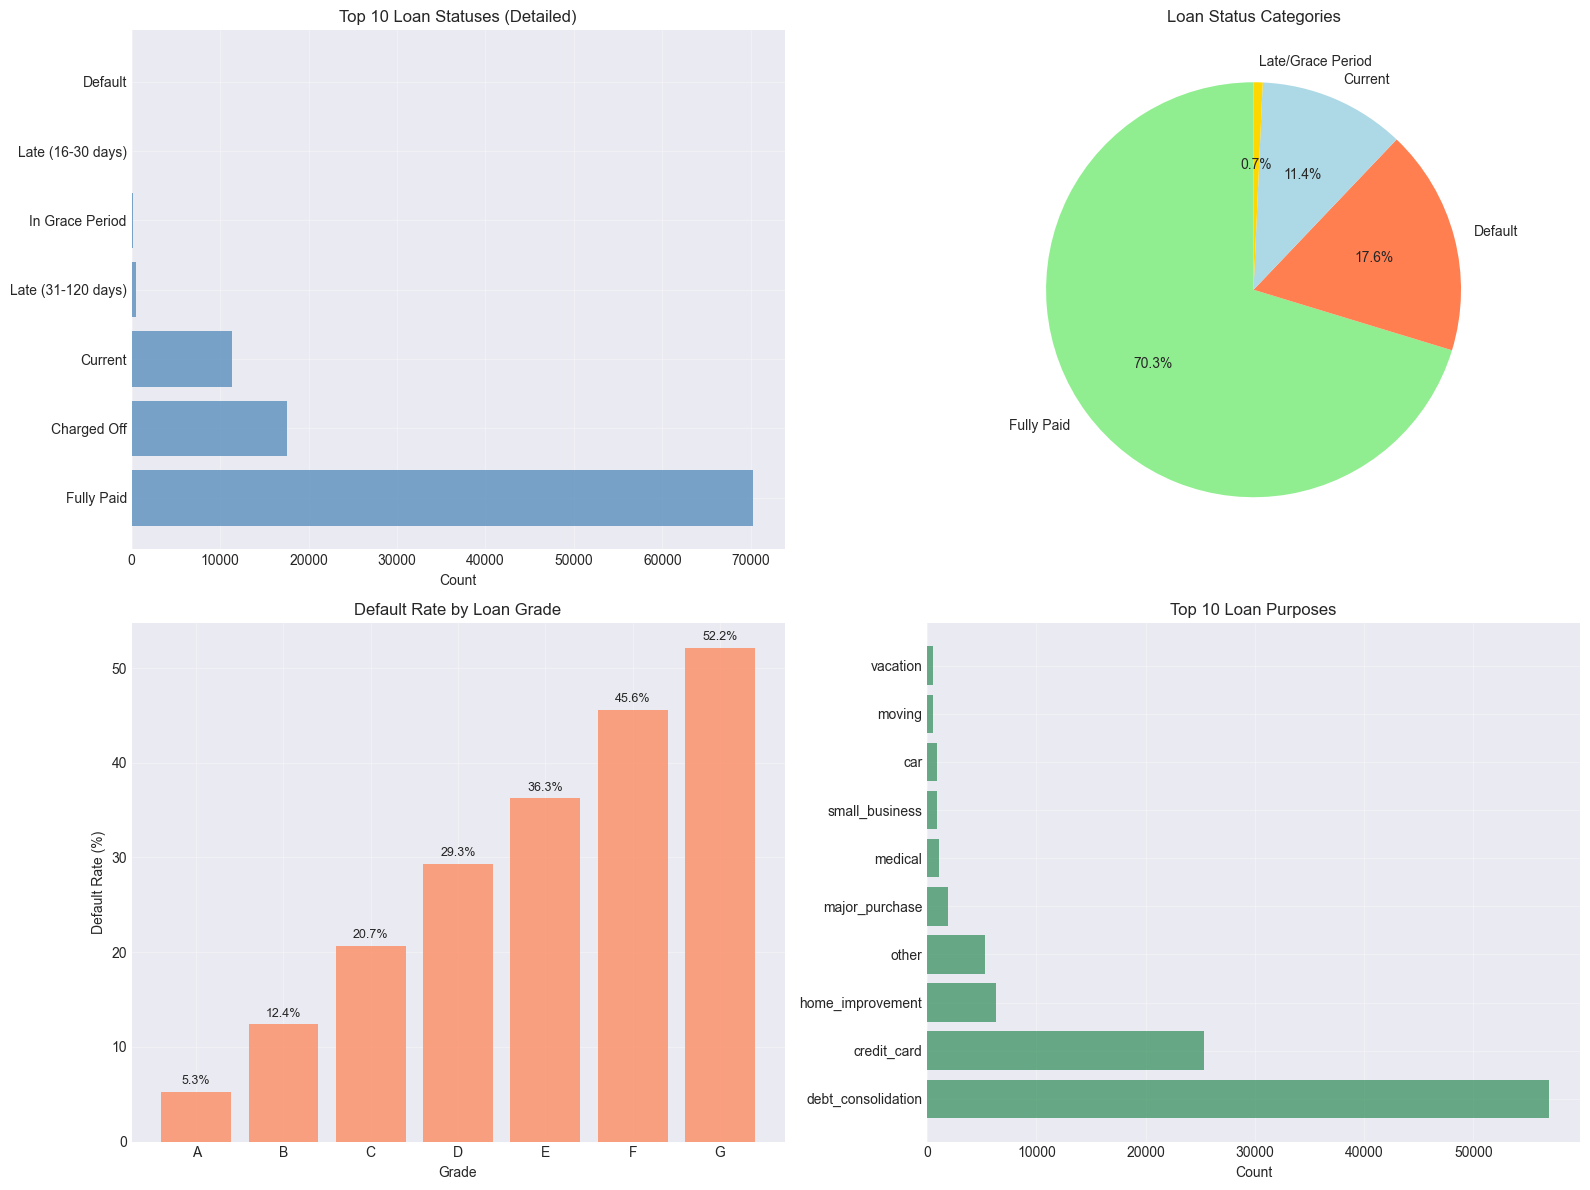


📊 DEFAULT STATISTICS:
Default rate: 18.24%
Total defaults: 18,244 out of 100,000 loans

Default Rate by Grade:


,Default_Rate(%),Loan_Count
grade,,
A,5.28,17493
B,12.37,30772
C,20.67,29198
D,29.32,13344
E,36.25,6951
F,45.59,1849
G,52.16,393


In [13]:
if 'loan_status' in df.columns:
    loan_status_counts = df['loan_status'].value_counts()
    loan_status_pct = (loan_status_counts / len(df)) * 100
    
    status_summary = pd.DataFrame({
        'Count': loan_status_counts,
        'Percentage': loan_status_pct
    })
    
    print("Loan Status Distribution:")
    display(status_summary)
    
    def categorize_loan_status(status):
        if pd.isna(status):
            return 'Unknown'
        status = str(status).lower()
        if 'charged off' in status or 'default' in status:
            return 'Default'
        elif 'fully paid' in status:
            return 'Fully Paid'
        elif 'current' in status or 'in progress' in status:
            return 'Current'
        elif 'late' in status or 'grace' in status:
            return 'Late/Grace Period'
        else:
            return 'Other'
    
    df_work['loan_status_category'] = df['loan_status'].apply(categorize_loan_status)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    top_statuses = loan_status_counts.head(10)
    axes[0, 0].barh(range(len(top_statuses)), top_statuses.values, color='steelblue', alpha=0.7)
    axes[0, 0].set_yticks(range(len(top_statuses)))
    axes[0, 0].set_yticklabels(top_statuses.index)
    axes[0, 0].set_xlabel('Count')
    axes[0, 0].set_title('Top 10 Loan Statuses (Detailed)')
    axes[0, 0].grid(True, alpha=0.3)
    
    category_counts = df_work['loan_status_category'].value_counts()
    colors = ['lightgreen', 'coral', 'lightblue', 'gold', 'lightgray']
    wedges, texts, autotexts = axes[0, 1].pie(category_counts.values, labels=category_counts.index, 
                                                autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0, 1].set_title('Loan Status Categories')
    
    if 'grade' in df_work.columns and 'is_default' in df_work.columns:
        default_by_grade = df_work.groupby('grade')['is_default'].mean() * 100
        axes[1, 0].bar(default_by_grade.index, default_by_grade.values, color='coral', alpha=0.7)
        axes[1, 0].set_xlabel('Grade')
        axes[1, 0].set_ylabel('Default Rate (%)')
        axes[1, 0].set_title('Default Rate by Loan Grade')
        axes[1, 0].grid(True, alpha=0.3)
        
        for i, v in enumerate(default_by_grade.values):
            axes[1, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
    
    if 'purpose' in df_work.columns:
        top_purposes = df_work['purpose'].value_counts().head(10)
        axes[1, 1].barh(range(len(top_purposes)), top_purposes.values, color='seagreen', alpha=0.7)
        axes[1, 1].set_yticks(range(len(top_purposes)))
        axes[1, 1].set_yticklabels(top_purposes.index)
        axes[1, 1].set_xlabel('Count')
        axes[1, 1].set_title('Top 10 Loan Purposes')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    if 'is_default' in df_work.columns:
        default_rate = df_work['is_default'].mean() * 100
        print(f"\n📊 DEFAULT STATISTICS:")
        print(f"Default rate: {default_rate:.2f}%")
        print(f"Total defaults: {df_work['is_default'].sum():,} out of {len(df_work):,} loans")
        
        if 'grade' in df_work.columns:
            print("\nDefault Rate by Grade:")
            default_by_grade = df_work.groupby('grade')['is_default'].agg(['mean', 'count'])
            default_by_grade['mean'] = default_by_grade['mean'] * 100
            default_by_grade.columns = ['Default_Rate(%)', 'Loan_Count']
            display(default_by_grade)
else:
    print("'loan_status' column not found in dataset")

### 6. TIME SERIES ANALYSIS

Found date-related columns: ['issue_d', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'mths_since_last_major_derog', 'inq_last_12m', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mths_since_last_major_derog', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_date']

Analyzing 'issue_d' (Issue Date) column...
Đang chuyển đổi định dạng ngày tháng...
Tỷ lệ chuyển đổi thành công: 100.00%

Yearly Statistics:


,loan_count,avg_loan_amount,total_loan_amount,avg_interest_rate,default_rate
issue_year,,,,,
2015,100000,15055.86,1505586048.00,12.20,18.00


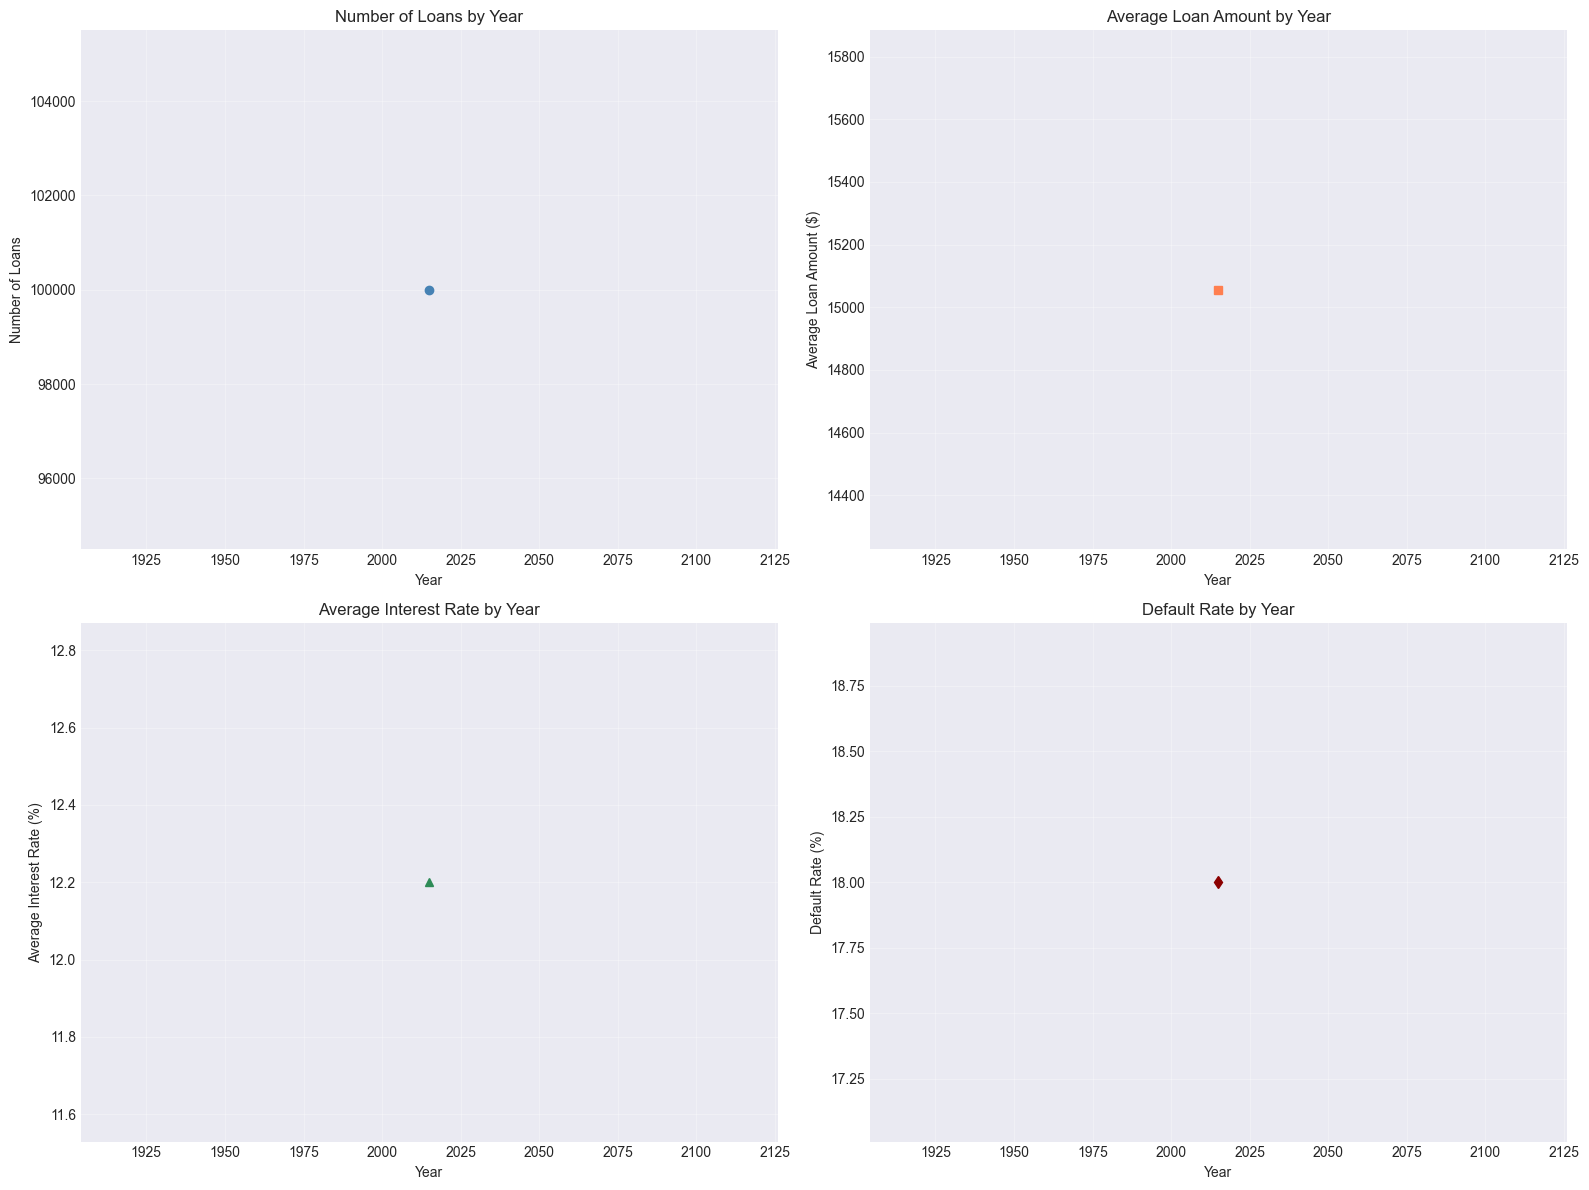

In [20]:
date_columns = [col for col in df.columns if 'date' in col.lower() or 
                'issue' in col.lower() or 
                'last' in col.lower() or 
                'earliest' in col.lower()]

print(f"Found date-related columns: {date_columns}")

if 'issue_d' in df.columns:
    print("\nAnalyzing 'issue_d' (Issue Date) column...")
    
    if 'issue_d' not in df_work.columns:
        df_work['issue_d'] = df['issue_d']
        print("Đã khôi phục cột 'issue_d' từ dữ liệu gốc vào bảng làm việc.")
    
    print("Đang chuyển đổi định dạng ngày tháng...")
    
    df_work['issue_date'] = pd.to_datetime(df_work['issue_d'], errors='coerce')
    
    conversion_rate = df_work['issue_date'].notna().mean() * 100
    print(f"Tỷ lệ chuyển đổi thành công: {conversion_rate:.2f}%")
    
    if conversion_rate > 0:
        df_work['issue_year'] = df_work['issue_date'].dt.year
        df_work['issue_month'] = df_work['issue_date'].dt.month
        
        yearly_stats = df_work.groupby('issue_year').agg({
            'loan_amnt': ['count', 'mean', 'sum'],
            'int_rate': 'mean',
            'is_default': 'mean' if 'is_default' in df_work.columns else None
        }).round(2)
        
        yearly_stats.columns = ['_'.join(col).strip('_') for col in yearly_stats.columns.values]
        yearly_stats = yearly_stats.rename(columns={
            'loan_amnt_count': 'loan_count',
            'loan_amnt_mean': 'avg_loan_amount',
            'loan_amnt_sum': 'total_loan_amount',
            'int_rate_mean': 'avg_interest_rate',
            'is_default_mean': 'default_rate'
        })
        
        if 'default_rate' in yearly_stats.columns:
            yearly_stats['default_rate'] = yearly_stats['default_rate'] * 100
        
        print("\nYearly Statistics:")
        display(yearly_stats)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        axes[0, 0].plot(yearly_stats.index, yearly_stats['loan_count'], 
                        marker='o', linewidth=2, markersize=6, color='steelblue')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Number of Loans')
        axes[0, 0].set_title('Number of Loans by Year')
        axes[0, 0].grid(True, alpha=0.3)
        
        axes[0, 1].plot(yearly_stats.index, yearly_stats['avg_loan_amount'], 
                        marker='s', linewidth=2, markersize=6, color='coral')
        axes[0, 1].set_xlabel('Year')
        axes[0, 1].set_ylabel('Average Loan Amount ($)')
        axes[0, 1].set_title('Average Loan Amount by Year')
        axes[0, 1].grid(True, alpha=0.3)
        
        axes[1, 0].plot(yearly_stats.index, yearly_stats['avg_interest_rate'], 
                        marker='^', linewidth=2, markersize=6, color='seagreen')
        axes[1, 0].set_xlabel('Year')
        axes[1, 0].set_ylabel('Average Interest Rate (%)')
        axes[1, 0].set_title('Average Interest Rate by Year')
        axes[1, 0].grid(True, alpha=0.3)
        
        if 'default_rate' in yearly_stats.columns:
            axes[1, 1].plot(yearly_stats.index, yearly_stats['default_rate'], 
                            marker='d', linewidth=2, markersize=6, color='darkred')
            axes[1, 1].set_ylabel('Default Rate (%)')
            axes[1, 1].set_title('Default Rate by Year')
        else:
            axes[1, 1].plot(yearly_stats.index, yearly_stats['total_loan_amount'] / 1e6, 
                            marker='d', linewidth=2, markersize=6, color='purple')
            axes[1, 1].set_ylabel('Volume (Millions $)')
            axes[1, 1].set_title('Total Loan Volume by Year')
            
        axes[1, 1].set_xlabel('Year')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("Không thể chuyển đổi cột ngày tháng.")
else:
    print("'issue_d' column not found for time series analysis")

### 7. NUMERICAL VARIABLES ANALYSIS

Found 14 numerical columns
Numerical columns: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'is_default']

Basic Statistics for Numerical Variables:


,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,100000.00,15055.86,8641.84,1000.00,8000.00,13875.00,20000.00,35000.00,0.00
int_rate,100000.00,12.20,4.14,5.32,9.17,11.99,14.48,28.99,0.00
annual_inc,100000.00,78371.35,89296.12,0.00,47600.00,65000.00,94000.00,9000000.00,0.00
dti,99998.00,19.25,9.63,0.00,12.57,18.70,25.53,999.00,0.00
delinq_2yrs,100000.00,0.35,0.92,0.00,0.00,0.00,0.00,30.00,0.00
open_acc,100000.00,11.95,5.68,1.00,8.00,11.00,15.00,67.00,0.00
revol_bal,100000.00,17673.16,23709.06,0.00,6276.75,11813.50,21349.00,898146.00,0.00
revol_util,99963.00,52.50,24.13,0.00,34.40,52.40,70.90,152.50,0.04


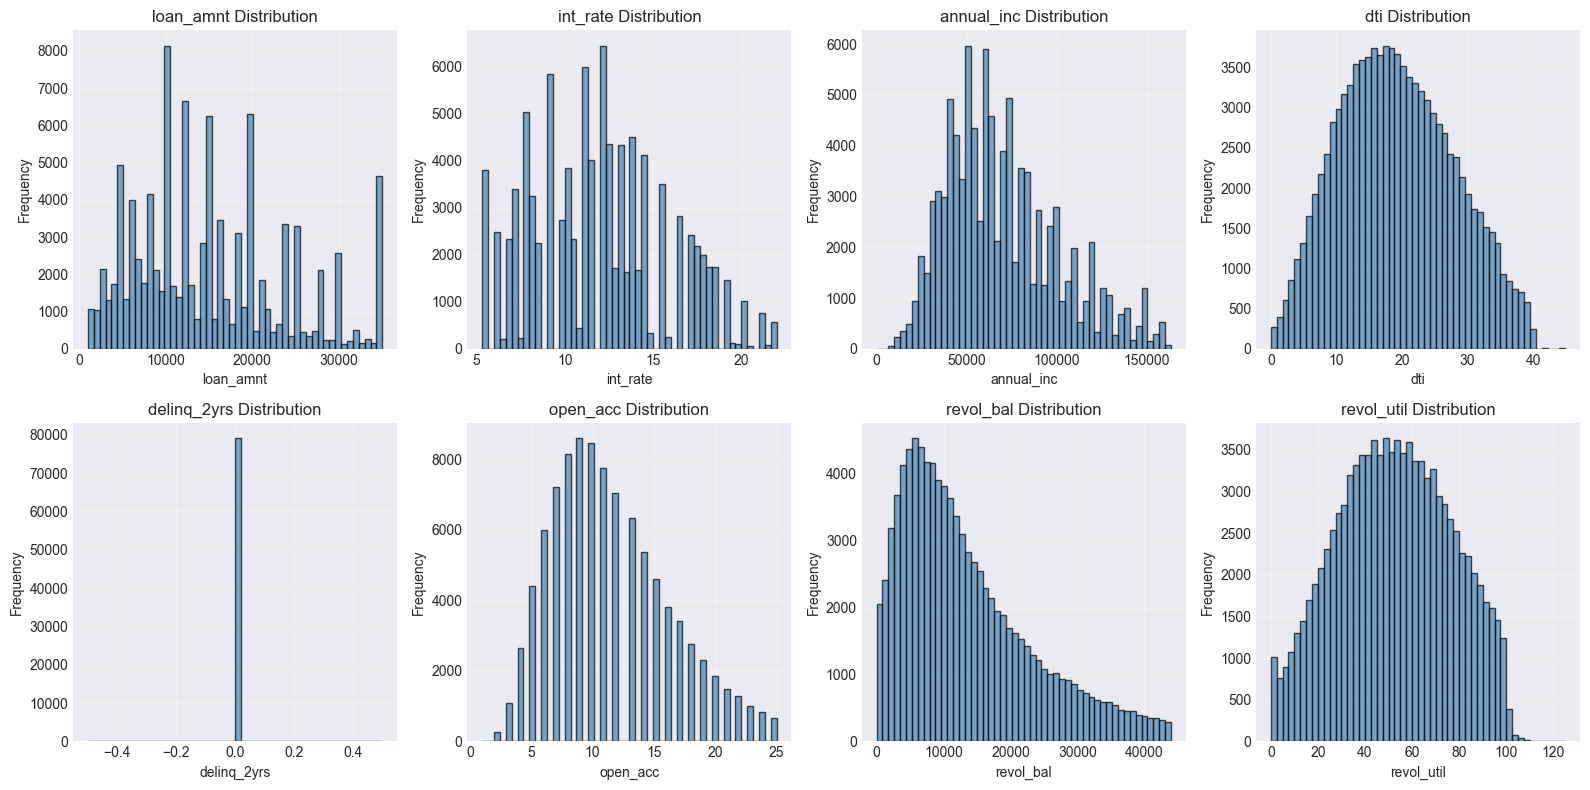

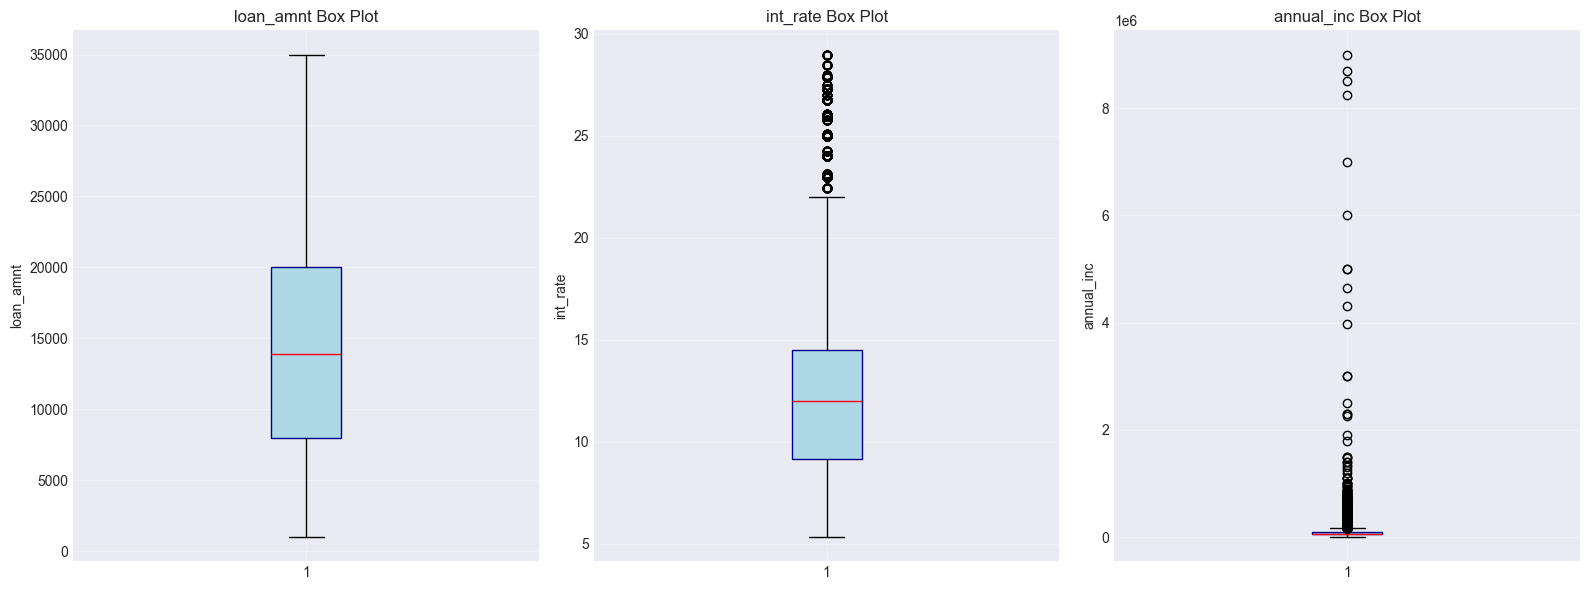


CORRELATION ANALYSIS WITH DEFAULT RATE:
Top 10 Numerical Features Correlated with Default Rate:


,correlation
total_rec_prncp,-0.41
total_pymnt,-0.30
last_pymnt_amnt,-0.28
int_rate,0.26
dti,0.09
loan_amnt,0.04
annual_inc,-0.04
revol_bal,-0.04
open_acc,0.03
revol_util,0.03


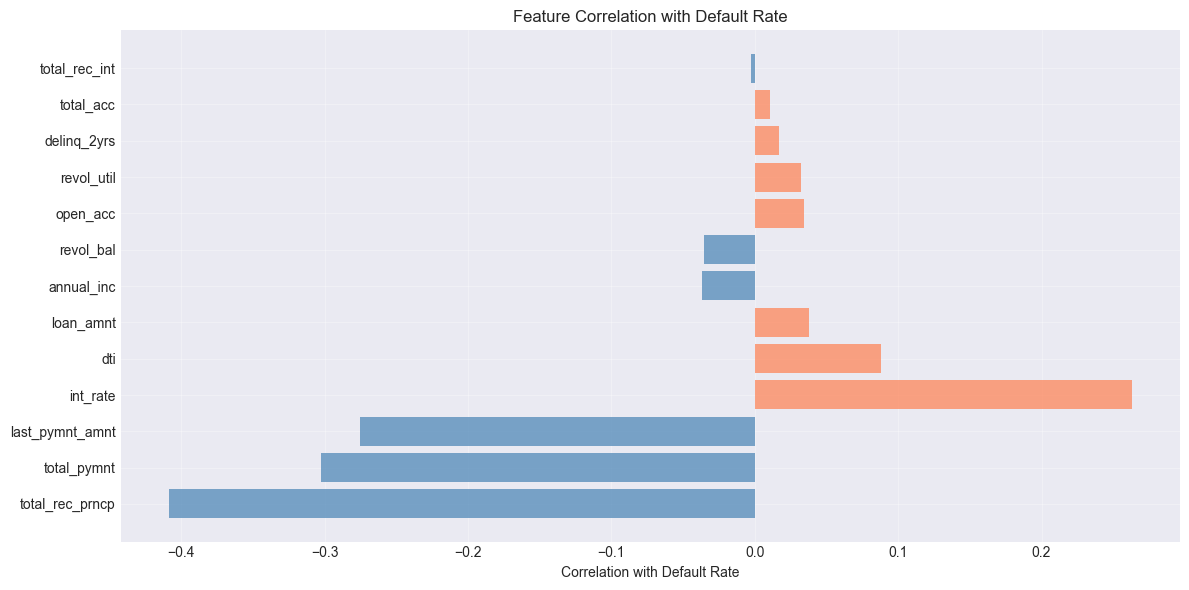

In [15]:
numerical_cols = df_work.select_dtypes(include=[np.number]).columns.tolist()
print(f"Found {len(numerical_cols)} numerical columns")
print(f"Numerical columns: {numerical_cols}")

if numerical_cols:
    top_numerical = numerical_cols[:8] if len(numerical_cols) >= 8 else numerical_cols
    
    print("\nBasic Statistics for Numerical Variables:")
    stats_summary = df_work[top_numerical].describe().T
    stats_summary['missing_pct'] = (df_work[top_numerical].isnull().sum() / len(df_work)) * 100
    display(stats_summary)
    
    n_cols = min(4, len(top_numerical))
    n_rows = (len(top_numerical) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(top_numerical):
        if idx < len(axes):
            data = df_work[col].dropna()
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            data_filtered = data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]
            
            axes[idx].hist(data_filtered, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
            axes[idx].set_title(f'{col} Distribution')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(top_numerical), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, min(3, len(top_numerical)), figsize=(16, 6))
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    for idx, col in enumerate(top_numerical[:len(axes)]):
        axes[idx].boxplot(df_work[col].dropna(), vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='darkblue'),
                          medianprops=dict(color='red'))
        axes[idx].set_title(f'{col} Box Plot')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    if 'is_default' in df_work.columns and len(numerical_cols) > 1:
        print("\nCORRELATION ANALYSIS WITH DEFAULT RATE:")
        
        corr_with_default = {}
        for col in numerical_cols:
            if col != 'is_default':
                corr = df_work[[col, 'is_default']].dropna().corr().iloc[0, 1]
                corr_with_default[col] = corr
        
        corr_df = pd.DataFrame.from_dict(corr_with_default, orient='index', columns=['correlation'])
        corr_df = corr_df.sort_values('correlation', key=abs, ascending=False)
        
        print("Top 10 Numerical Features Correlated with Default Rate:")
        display(corr_df.head(10))
        
        plt.figure(figsize=(12, 6))
        top_corr = corr_df.head(15)
        colors = ['coral' if x > 0 else 'steelblue' for x in top_corr['correlation']]
        plt.barh(range(len(top_corr)), top_corr['correlation'], color=colors, alpha=0.7)
        plt.yticks(range(len(top_corr)), top_corr.index)
        plt.xlabel('Correlation with Default Rate')
        plt.title('Feature Correlation with Default Rate')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No numerical columns found for analysis")

### 8. CATEGORICAL VARIABLES ANALYSIS



CATEGORICAL VARIABLES ANALYSIS
Found 11 categorical columns
Categorical columns: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'application_type', 'loan_status_category']

Analysis for 'grade':
----------------------------------------
Unique values: 7
Top 5 values:


,Value,Count,Percentage
0,B,30772,30.77
1,C,29198,29.20
2,A,17493,17.49
3,D,13344,13.34
4,E,6951,6.95



Default Rate by grade (Top 10):


,Default_Rate(%),Loan_Count
grade,,
G,52.16,393
F,45.59,1849
E,36.25,6951
D,29.32,13344
C,20.67,29198
B,12.37,30772
A,5.28,17493



Analysis for 'home_ownership':
----------------------------------------
Unique values: 4
Top 5 values:


,Value,Count,Percentage
0,MORTGAGE,49477,49.48
1,RENT,39257,39.26
2,OWN,11265,11.26
3,ANY,1,0.00



Default Rate by home_ownership (Top 10):


,Default_Rate(%),Loan_Count
home_ownership,,
RENT,21.25,39257
OWN,18.91,11265
MORTGAGE,15.71,49477
ANY,0.00,1



Analysis for 'purpose':
----------------------------------------
Unique values: 12
Top 5 values:


,Value,Count,Percentage
0,debt_consolidation,56914,56.91
1,credit_card,25312,25.31
2,home_improvement,6283,6.28
3,other,5261,5.26
4,major_purchase,1951,1.95



Default Rate by purpose (Top 10):


,Default_Rate(%),Loan_Count
purpose,,
small_business,28.46,868
house,24.84,314
moving,21.75,561
medical,21.28,1109
debt_consolidation,19.72,56914
renewable_energy,19.64,56
other,18.30,5261
major_purchase,18.04,1951
vacation,17.30,503



Analysis for 'addr_state':
----------------------------------------
Unique values: 49
Top 5 values:


,Value,Count,Percentage
0,CA,13435,13.44
1,TX,8331,8.33
2,NY,8146,8.15
3,FL,6993,6.99
4,IL,4033,4.03



Default Rate by addr_state (Top 10):


,Default_Rate(%),Loan_Count
addr_state,,
OK,23.97,951
NE,23.96,480
AR,22.49,778
SD,22.44,205
MS,21.88,608
LA,21.67,1112
AL,21.27,1260
KY,20.31,970
AK,20.28,217



Analysis for 'verification_status':
----------------------------------------
Unique values: 3
Top 5 values:


,Value,Count,Percentage
0,Source Verified,42260,42.26
1,Verified,31798,31.80
2,Not Verified,25942,25.94



Default Rate by verification_status (Top 10):


,Default_Rate(%),Loan_Count
verification_status,,
Verified,22.86,31798
Source Verified,18.00,42260
Not Verified,12.99,25942


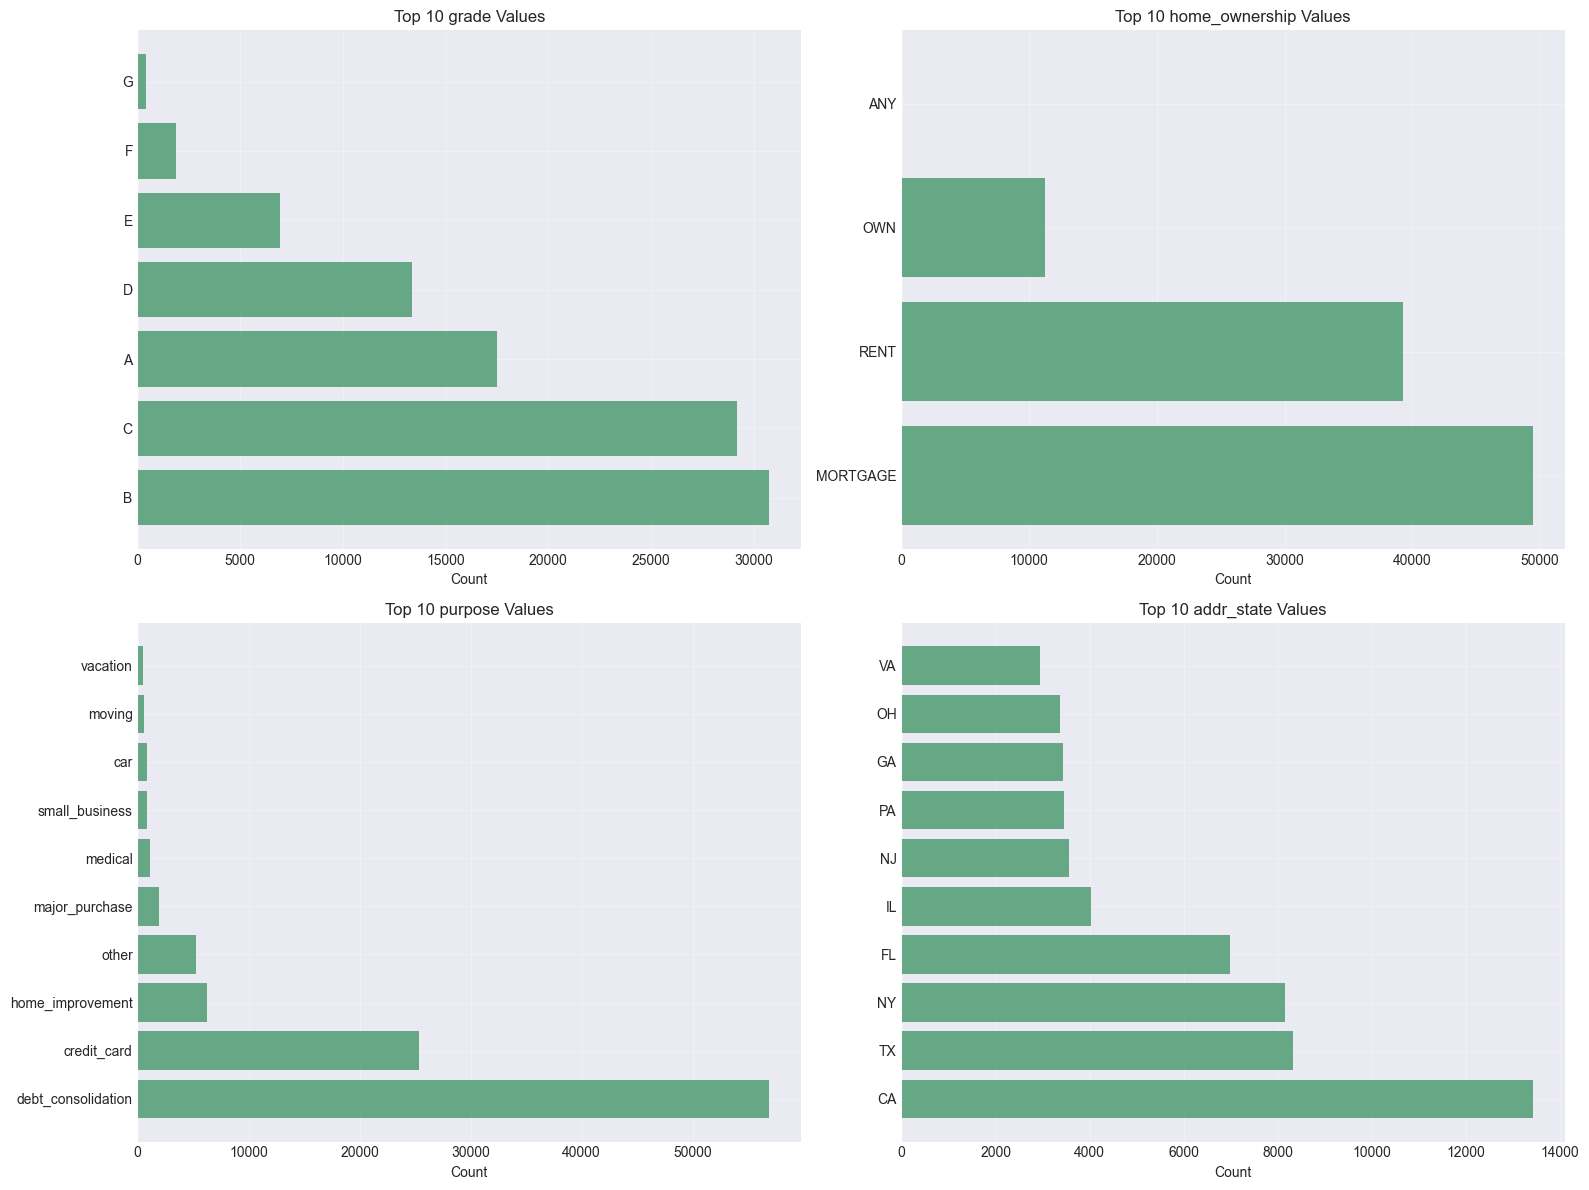

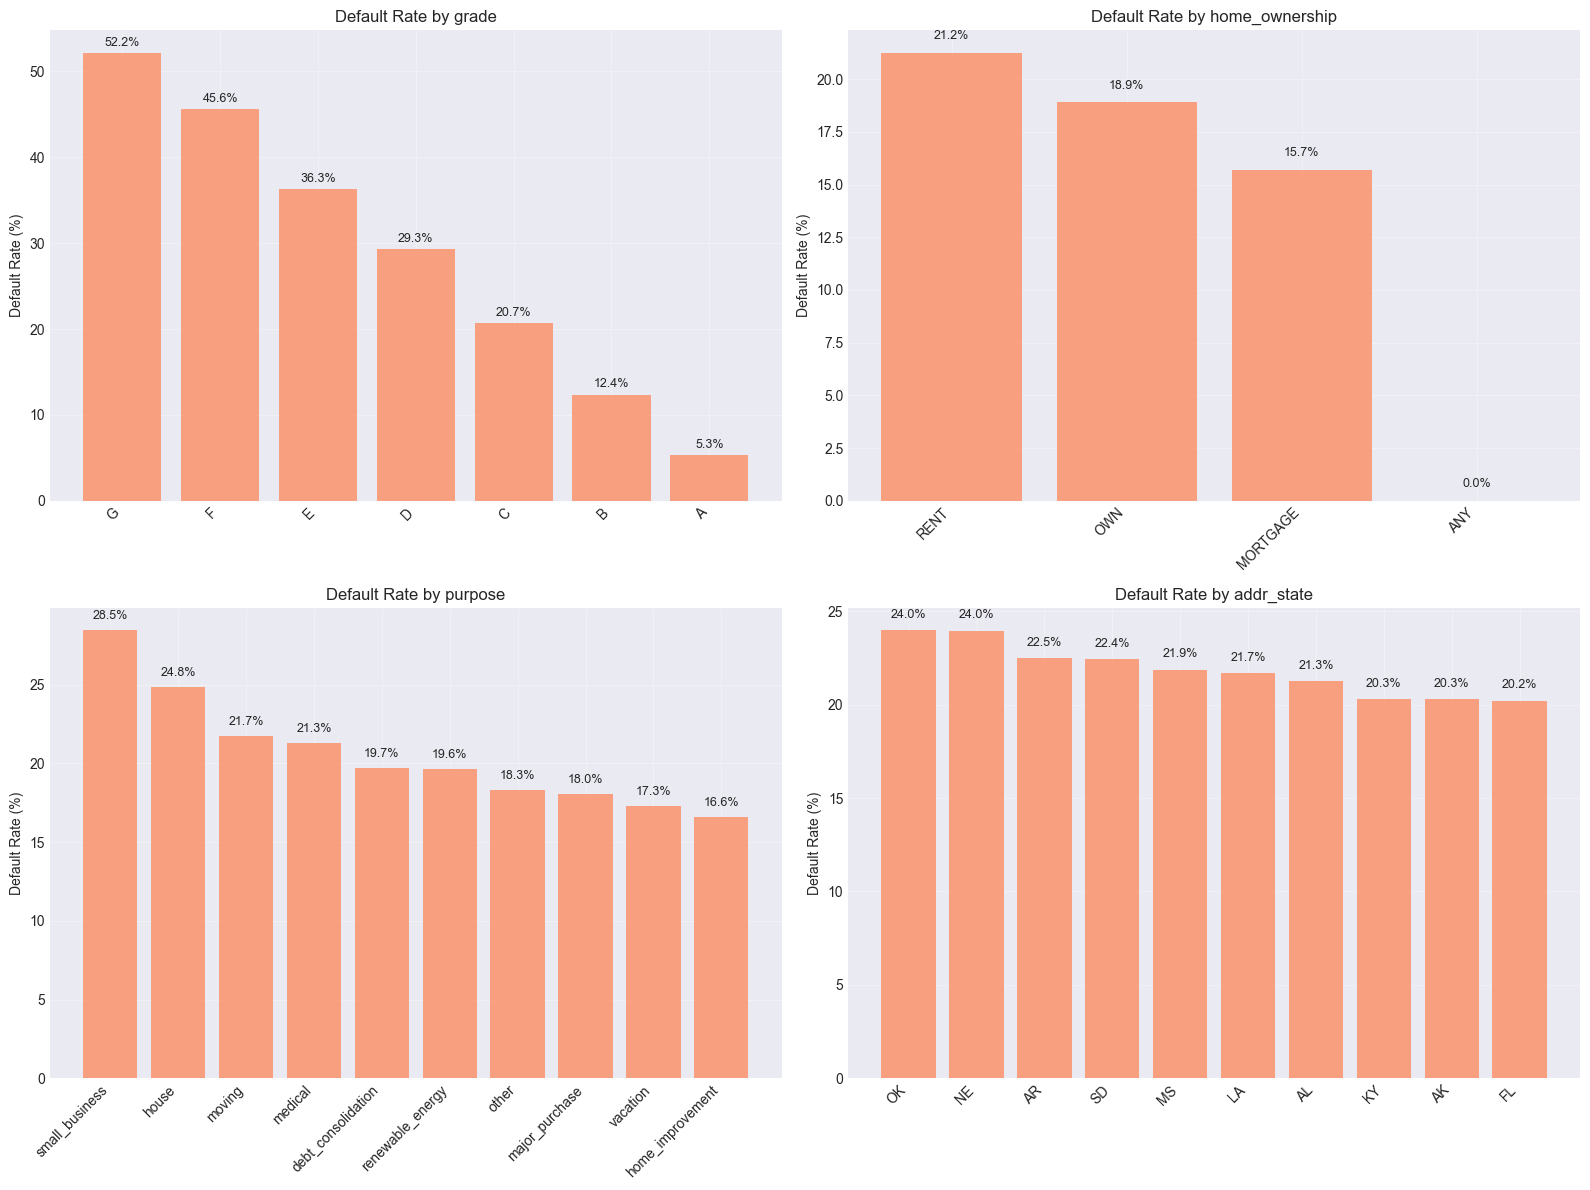

In [16]:
print("\nCATEGORICAL VARIABLES ANALYSIS")
print("=" * 50)

categorical_cols = df_work.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_cols)} categorical columns")
print(f"Categorical columns: {categorical_cols}")

if categorical_cols:
    top_categorical = [col for col in ['grade', 'home_ownership', 'purpose', 'addr_state', 'verification_status'] 
                       if col in categorical_cols][:6]
    
    if not top_categorical:
        top_categorical = categorical_cols[:6]
    
    for col in top_categorical:
        print(f"\nAnalysis for '{col}':")
        print("-" * 40)
        
        value_counts = df_work[col].value_counts()
        print(f"Unique values: {df_work[col].nunique()}")
        print(f"Top 5 values:")
        display(pd.DataFrame({
            'Value': value_counts.head().index,
            'Count': value_counts.head().values,
            'Percentage': (value_counts.head().values / len(df_work) * 100).round(2)
        }))
        
        if 'is_default' in df_work.columns:
            default_by_cat = df_work.groupby(col)['is_default'].mean().sort_values(ascending=False)
            default_by_cat = default_by_cat * 100
            
            print(f"\nDefault Rate by {col} (Top 10):")
            display(pd.DataFrame({
                'Default_Rate(%)': default_by_cat.head(10),
                'Loan_Count': df_work.groupby(col).size()[default_by_cat.head(10).index]
            }))
    
    n_plots = min(4, len(top_categorical))
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(top_categorical[:n_plots]):
        top_cats = df_work[col].value_counts().head(10)
        
        axes[idx].barh(range(len(top_cats)), top_cats.values, color='seagreen', alpha=0.7)
        axes[idx].set_yticks(range(len(top_cats)))
        axes[idx].set_yticklabels(top_cats.index)
        axes[idx].set_xlabel('Count')
        axes[idx].set_title(f'Top 10 {col} Values')
        axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(top_categorical[:n_plots]), 4):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    if 'is_default' in df_work.columns:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        for idx, col in enumerate(top_categorical[:4]):
            if col in df_work.columns:
                default_by_cat = df_work.groupby(col)['is_default'].mean() * 100
                default_by_cat = default_by_cat.sort_values(ascending=False).head(10)
                
                bars = axes[idx].bar(range(len(default_by_cat)), default_by_cat.values, 
                                     color='coral', alpha=0.7)
                axes[idx].set_xticks(range(len(default_by_cat)))
                axes[idx].set_xticklabels(default_by_cat.index, rotation=45, ha='right')
                axes[idx].set_ylabel('Default Rate (%)')
                axes[idx].set_title(f'Default Rate by {col}')
                axes[idx].grid(True, alpha=0.3)
                
                for bar, value in zip(bars, default_by_cat.values):
                    axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                                   f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found for analysis")

### 9. DATA QUALITY REPORT AND RECOMMENDATIONS


In [17]:
quality_report = []

for col in df_work.columns:
    col_info = {
        'Column': col,
        'Data_Type': str(df_work[col].dtype),
        'Total_Values': len(df_work),
        'Missing_Count': df_work[col].isnull().sum(),
        'Missing_Percentage': (df_work[col].isnull().sum() / len(df_work) * 100).round(2),
        'Unique_Values': df_work[col].nunique(),
    }
    
    if df_work[col].dtype in ['int64', 'float64', 'int32', 'float32']:
        col_info['Min'] = df_work[col].min() if not df_work[col].isnull().all() else None
        col_info['Max'] = df_work[col].max() if not df_work[col].isnull().all() else None
        col_info['Mean'] = df_work[col].mean() if not df_work[col].isnull().all() else None
    else:
        col_info['Top_Value'] = df_work[col].value_counts().index[0] if not df_work[col].isnull().all() else None
        col_info['Top_Value_Count'] = df_work[col].value_counts().iloc[0] if not df_work[col].isnull().all() else None
    
    quality_report.append(col_info)

quality_df = pd.DataFrame(quality_report)
print("\nData Quality Summary (First 15 columns):")
display(quality_df.head(15))

print("\nOVERALL DATA QUALITY SUMMARY:")
print("-" * 40)
print(f"Total rows: {len(df_work):,}")
print(f"Total columns: {len(df_work.columns)}")
print(f"Total missing values: {df_work.isnull().sum().sum():,}")
print(f"Percentage of missing data: {(df_work.isnull().sum().sum() / (len(df_work) * len(df_work.columns)) * 100):.2f}%")

print("\n🔧 RECOMMENDATIONS FOR DATA CLEANING:")
print("-" * 40)

high_missing_cols = quality_df[quality_df['Missing_Percentage'] > 50]['Column'].tolist()
if high_missing_cols:
    print(f"1. Columns with >50% missing values ({len(high_missing_cols)} columns):")
    for col in high_missing_cols[:5]:  
        pct = quality_df[quality_df['Column'] == col]['Missing_Percentage'].values[0]
        print(f"   - {col}: {pct}% missing")
    print("   Recommendation: Consider dropping these columns")

low_variance_cols = []
for col in df_work.columns:
    if df_work[col].nunique() == 1:
        low_variance_cols.append(col)
if low_variance_cols:
    print(f"\n2. Constant columns ({len(low_variance_cols)} columns):")
    for col in low_variance_cols:
        print(f"   - {col}: Only 1 unique value")
    print("   Recommendation: Drop these columns as they provide no information")

high_cardinality_cols = []
for col in df_work.select_dtypes(include=['object']).columns:
    if df_work[col].nunique() > 100:
        high_cardinality_cols.append(col)
if high_cardinality_cols:
    print(f"\n3. High cardinality columns ({len(high_cardinality_cols)} columns):")
    for col in high_cardinality_cols[:3]:
        unique_count = df_work[col].nunique()
        print(f"   - {col}: {unique_count:,} unique values")
    print("   Recommendation: Consider encoding, grouping, or dropping")

potential_numeric_cols = []
for col in df_work.select_dtypes(include=['object']).columns:
    sample = df_work[col].dropna().head(100)
    if sample.str.contains('^[0-9.,]+$').any():
        potential_numeric_cols.append(col)
if potential_numeric_cols:
    print(f"\n4. Potential numeric columns stored as text ({len(potential_numeric_cols)} columns):")
    for col in potential_numeric_cols[:3]:
        print(f"   - {col}")
    print("   Recommendation: Convert to appropriate numeric type")

print("\nEDA COMPLETED SUCCESSFULLY!")


Data Quality Summary (First 15 columns):


,Column,Data_Type,Total_Values,Missing_Count,Missing_Percentage,Unique_Values,Min,Max,Mean,Top_Value,Top_Value_Count
0,loan_amnt,float32,100000,0,0.00,1350,1000.00,35000.00,15055.86,NaN,NaN
1,term,object,100000,0,0.00,2,NaN,NaN,NaN,36 months,68053.00
2,int_rate,float32,100000,0,0.00,81,5.32,28.99,12.20,NaN,NaN
3,grade,object,100000,0,0.00,7,NaN,NaN,NaN,B,30772.00
4,sub_grade,object,100000,0,0.00,35,NaN,NaN,NaN,B3,6601.00
5,emp_length,object,100000,6112,6.11,11,NaN,NaN,NaN,10+ years,33591.00
6,home_ownership,object,100000,0,0.00,4,NaN,NaN,NaN,MORTGAGE,49477.00
7,annual_inc,float32,100000,0,0.00,7913,0.00,9000000.00,78371.35,NaN,NaN
8,verification_status,object,100000,0,0.00,3,NaN,NaN,NaN,Source Verified,42260.00
9,loan_status,object,100000,0,0.00,7,NaN,NaN,NaN,Fully Paid,70288.00



OVERALL DATA QUALITY SUMMARY:
----------------------------------------
Total rows: 100,000
Total columns: 25
Total missing values: 6,151
Percentage of missing data: 0.25%

🔧 RECOMMENDATIONS FOR DATA CLEANING:
----------------------------------------

EDA COMPLETED SUCCESSFULLY!


### 10. SAVE PROCESSED DATA


In [21]:
output_path = "../data/processed/eda_processed_data.csv"
    
df_work.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")
print(f"Size: {len(df_work):,} rows × {len(df_work.columns)} columns")
    
parquet_path = "../data/processed/eda_processed_data.parquet"
df_work.to_parquet(parquet_path, index=False)
print(f"Processed data saved as Parquet: {parquet_path}")
    
quality_path = "../reports/data_quality_report.csv"
quality_df.to_csv(quality_path, index=False)
print(f"Data quality report saved to: {quality_path}")
    
print("\nFiles saved successfully for next steps:")
print("   1. eda_processed_data.csv - Cleaned dataset for modeling")
print("   2. eda_processed_data.parquet - Optimized format for analysis")
print("   3. data_quality_report.csv - Detailed quality metrics")
print("   4. All visualization charts saved in /reports/ folder")

Processed data saved to: ../data/processed/eda_processed_data.csv
Size: 100,000 rows × 29 columns
Processed data saved as Parquet: ../data/processed/eda_processed_data.parquet
Data quality report saved to: ../reports/data_quality_report.csv

Files saved successfully for next steps:
   1. eda_processed_data.csv - Cleaned dataset for modeling
   2. eda_processed_data.parquet - Optimized format for analysis
   3. data_quality_report.csv - Detailed quality metrics
   4. All visualization charts saved in /reports/ folder
